<a href="https://colab.research.google.com/github/Starleen1996/Machine_Learning_modelos/blob/main/Optimizaci%C3%B3n_Aeroportuaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Para correr este código es necesario importar el documento: /content/flights.csv

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import yellowbrick

print(f'Versión de pandas: {pd.__version__}')
print(f'Versión de numpy: {np.__version__}')
print(f'Versión de scikit-learn (sklearn): {sklearn.__version__}')
print(f'Versión de seaborn: {sns.__version__}')
print(f'Versión de yellowbrick: {yellowbrick.__version__}')

Versión de pandas: 2.2.2
Versión de numpy: 2.0.2
Versión de scikit-learn (sklearn): 1.6.1
Versión de seaborn: 0.13.2
Versión de yellowbrick: 1.5


In [2]:
datos = pd.read_csv('/content/flights.csv')
datos.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271


In [4]:
datos.shape

(71175, 11)

In [5]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


In [6]:
datos.describe()

,flight_id,arrival_time,departure_time,day,year,delay
count,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000
mean,15.465135,13.283159,16.480222,182.000000,2016.000000,12.548378
std,8.649646,4.023380,4.143705,105.366769,3.741684,23.125349
min,1.000000,7.065594,10.065594,0.000000,2010.000000,-41.028033
25%,8.000000,8.939996,12.668655,91.000000,2013.000000,-4.412876
50%,15.000000,14.258911,16.376052,182.000000,2016.000000,9.740454
75%,23.000000,16.909690,20.041281,273.000000,2019.000000,27.650853
max,30.000000,19.341235,23.341235,364.000000,2022.000000,125.632352


In [7]:
datos.describe(include='O') # Podemos ver la estadistica descriptiva de las variables categoricas

,airline,aircraft_type,schengen,origin
count,71175,71175,71175,71175
unique,3,6,2,10
top,BZ,Airbus A320,schengen,TZF
freq,47598,30778,42569,14162


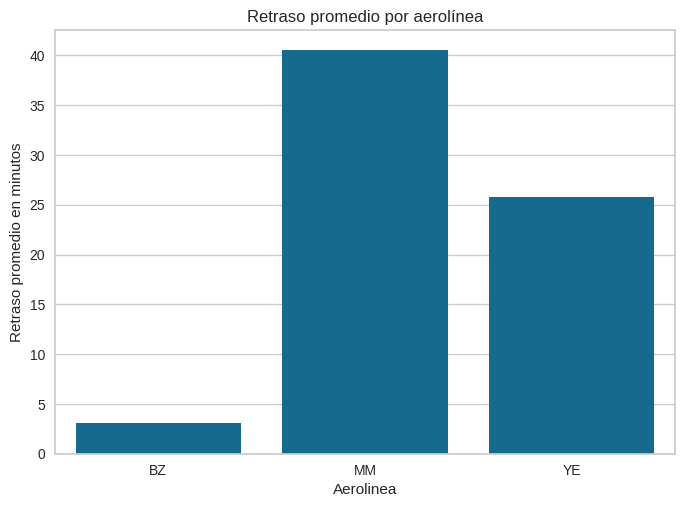

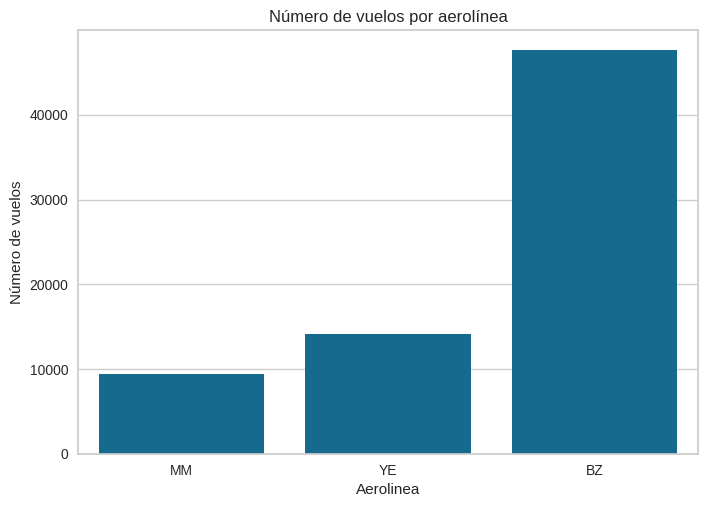

In [10]:
from itertools import groupby
import matplotlib.pyplot as plt

avg_delay = datos.groupby('airline')['delay'].mean().reset_index()
barplot = sns.barplot(x='airline', y='delay', data=avg_delay)
plt.title('Retraso promedio por aerolínea')
plt.xlabel('Aerolinea')
plt.ylabel('Retraso promedio en minutos')
plt.show()

sns.countplot(x='airline', data=datos)
plt.title('Número de vuelos por aerolínea')
plt.xlabel('Aerolinea')
plt.ylabel('Número de vuelos')
plt.show()

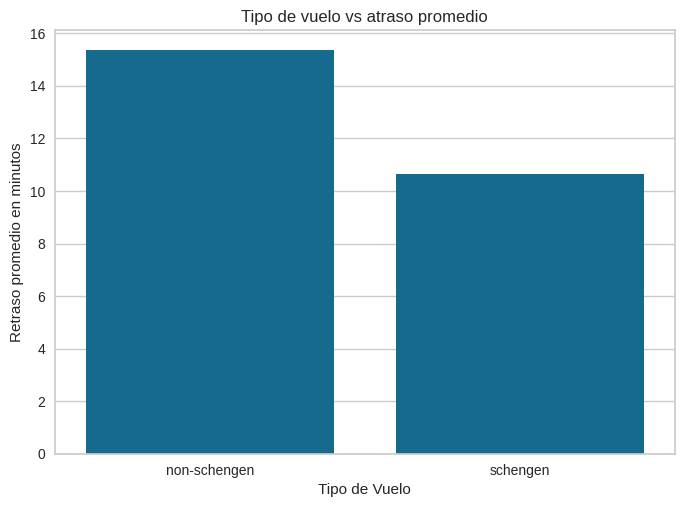

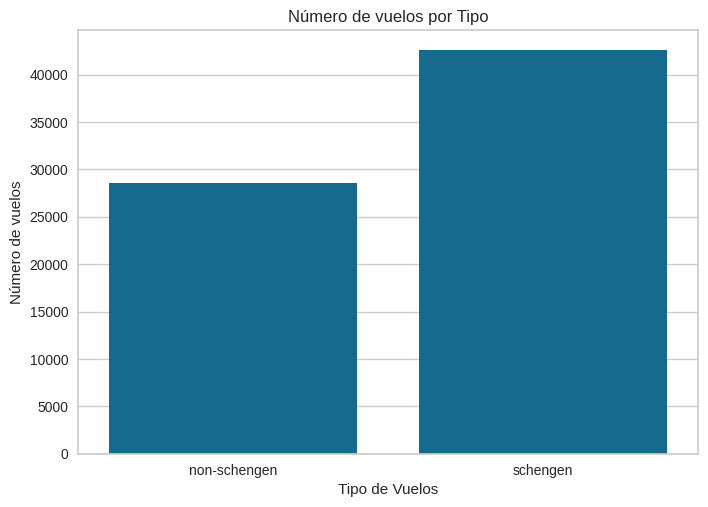

In [11]:
avg_delay = datos.groupby('schengen')['delay'].mean().reset_index()
barplot = sns.barplot(x='schengen', y='delay', data=avg_delay)
plt.title('Tipo de vuelo vs atraso promedio')
plt.xlabel('Tipo de Vuelo')
plt.ylabel('Retraso promedio en minutos')
plt.show()

sns.countplot(x='schengen', data=datos)
plt.title('Número de vuelos por Tipo')
plt.xlabel('Tipo de Vuelos')
plt.ylabel('Número de vuelos')
plt.show()

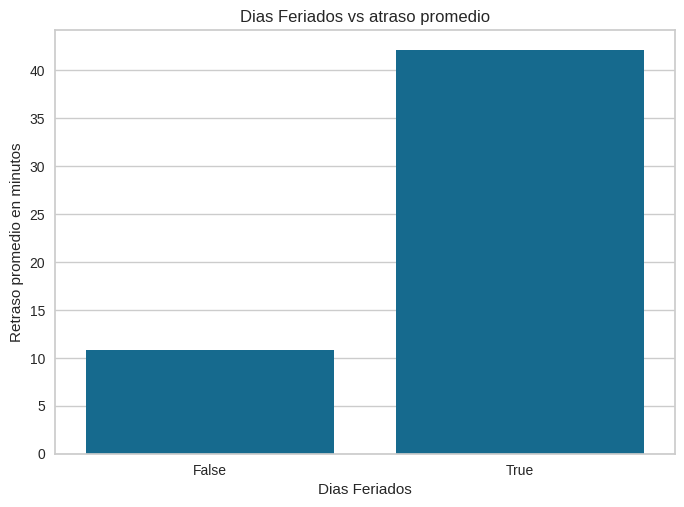

In [12]:
avg_delay = datos.groupby('is_holiday')['delay'].mean().reset_index()
barplot = sns.barplot(x='is_holiday', y='delay', data=avg_delay)
plt.title('Dias Feriados vs atraso promedio')
plt.xlabel('Dias Feriados')
plt.ylabel('Retraso promedio en minutos')
plt.show()

In [16]:
datos['aircraft_type'].value_counts()

,count
aircraft_type,
Airbus A320,30778
Airbus A330,16654
Boeing 787,9606
Embraer E175,7098
Boeing 737,4722
Boeing 777,2317


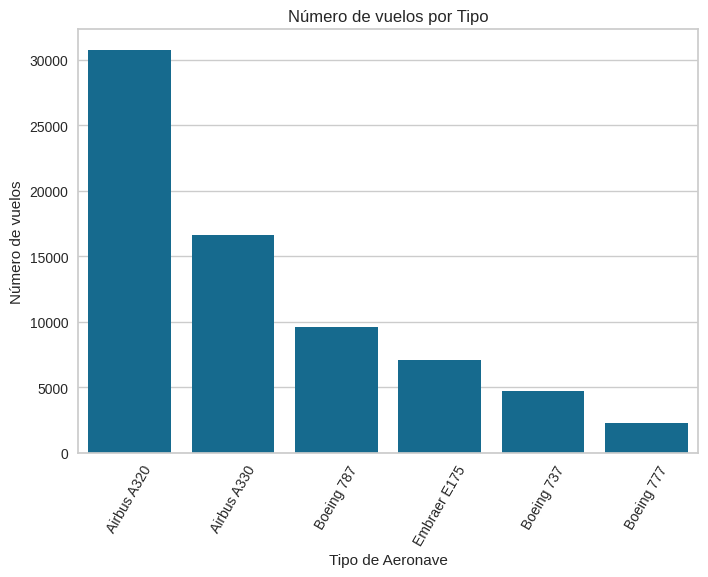

In [19]:
order = datos['aircraft_type'].value_counts().index
sns.countplot(x='aircraft_type', data=datos, order=order)
plt.xticks(rotation=60)
plt.title('Número de vuelos por Tipo')
plt.xlabel('Tipo de Aeronave')
plt.ylabel('Número de vuelos')
plt.show()

#### Analizando la distribución de los datos

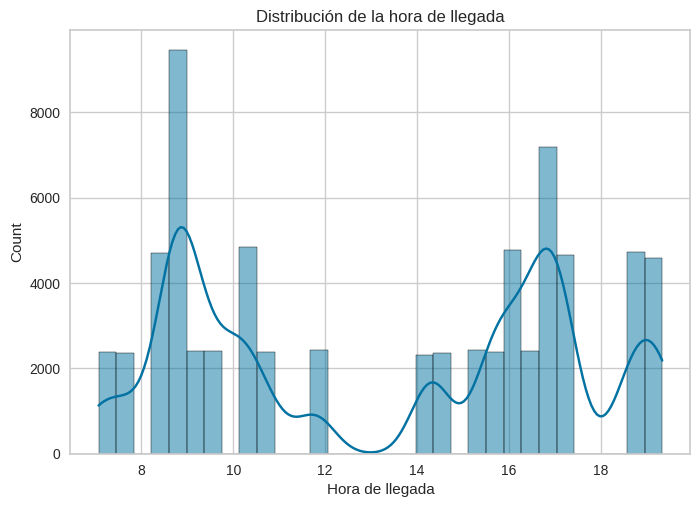

In [21]:
sns.histplot(data= datos, x='arrival_time',kde=True)
plt.title('Distribución de la hora de llegada')
plt.xlabel('Hora de llegada')
plt.show()

In [22]:
def ancho_bin(df,columna):
  q75,q25 = np.percentile(df[columna],[75,25])
  iqr = q75 - q25
  ancho = 2 * iqr * np.power(len(df[columna]), -1/3)
  return ancho


<Axes: xlabel='arrival_time', ylabel='Count'>

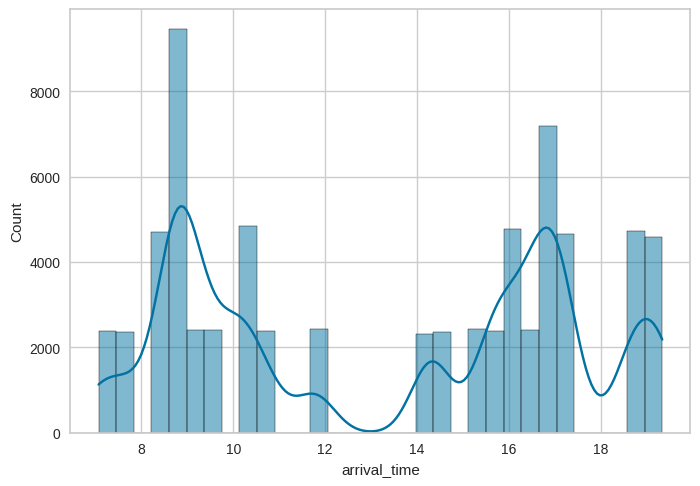

In [23]:
binwidth = ancho_bin(datos,'arrival_time')
sns.histplot(data= datos, x='arrival_time',kde=True,binwidth=binwidth)

<Axes: xlabel='departure_time', ylabel='Count'>

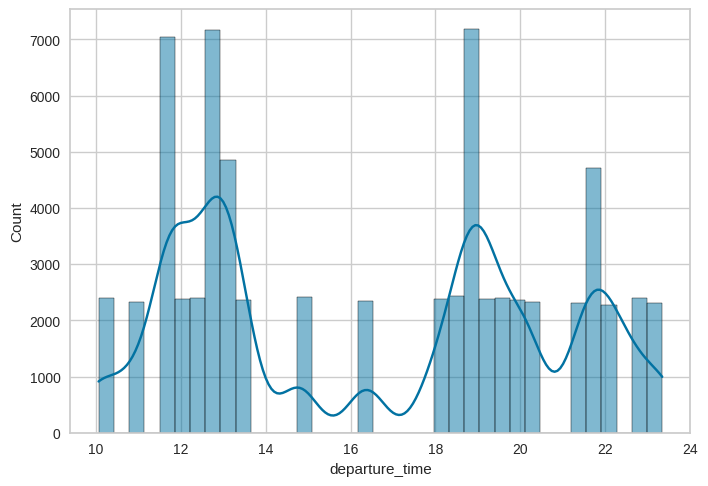

In [24]:
binwidth = ancho_bin(datos,'departure_time')
sns.histplot(data= datos, x='departure_time',kde=True,binwidth=binwidth)

El atraso promedio es: 12.548378015698628
El atraso mediano es: 9.740453855590491


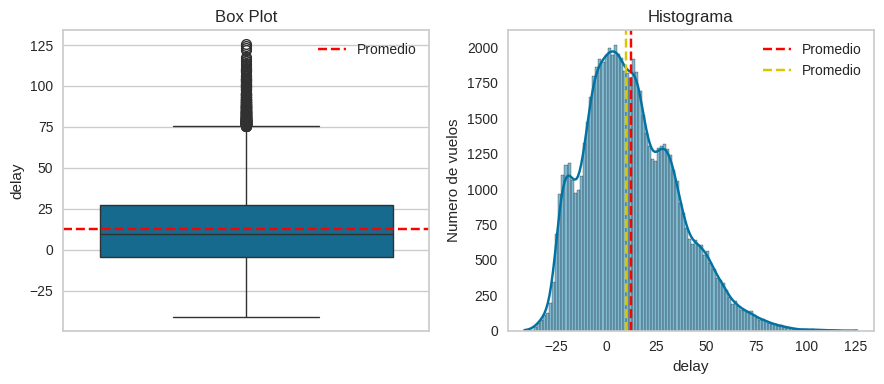

In [33]:
atraso_promedio = datos['delay'].mean()
atraso_mediana= datos['delay'].median()
print(f'El atraso promedio es: {atraso_promedio}')
print(f'El atraso mediano es: {atraso_mediana}')

fig, ax = plt.subplots(1,2,figsize=(9,4))

sns.boxplot(data=datos,y='delay',ax=ax[0])
ax[0].set_title('Box Plot')
ax[0].axhline(y= atraso_promedio,color='red',linestyle='--', label='Promedio')
ax[0].legend()

binwidth = ancho_bin(datos,'delay')
sns.histplot(data=datos,x='delay',ax=ax[1],kde=True, binwidth=binwidth)
plt.ylabel('Numero de vuelos')
plt.grid(False)
ax[1].set_title('Histograma')
ax[1].axvline(x= atraso_promedio,color='red',linestyle='--', label='Promedio')
ax[1].axvline(x= atraso_mediana,color='y',linestyle='--', label='Promedio')
ax[1].legend()

plt.tight_layout()

plt.show()



